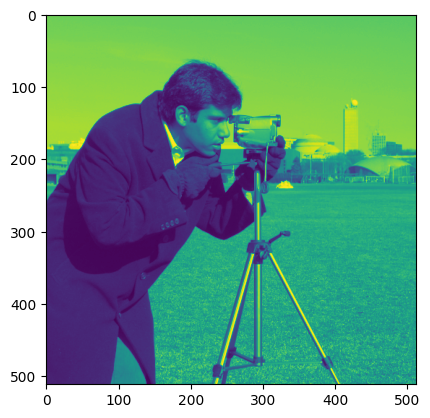

In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt



a = data.camera().astype(np.float64)

plt.imshow(a)
plt.show()

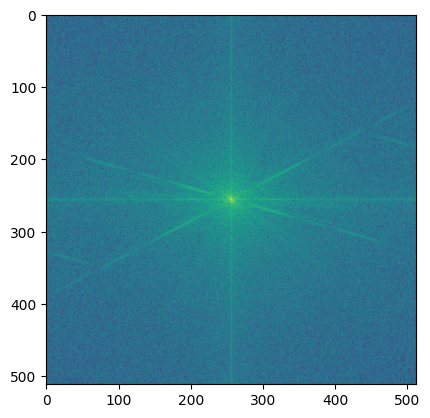

In [2]:
b = np.fft.fftshift(np.fft.fft2(a))

plt.imshow(np.log(np.abs(b)))
plt.show()

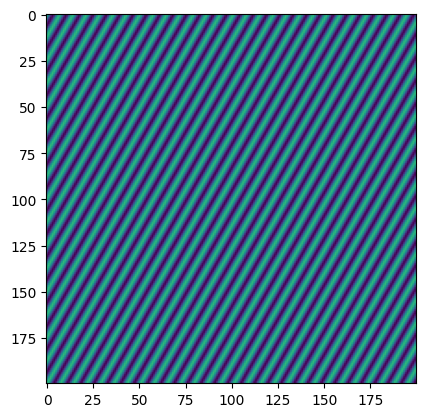

In [3]:
x, y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

angle = np.pi/6
x_ = x*np.cos(angle) + y*np.sin(angle)
y_ = -x*np.sin(angle) + y*np.cos(angle)

c = np.sin(10*x_) + 1*np.ones_like(x)

plt.imshow(c, vmin=0, vmax=3)
plt.show()

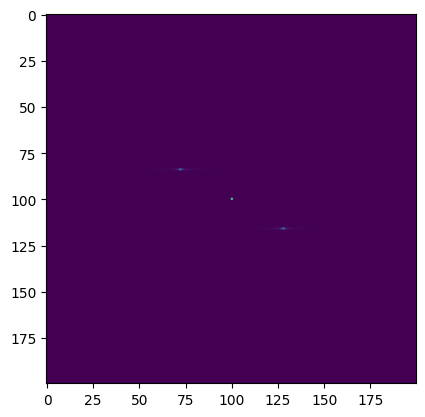

In [4]:
cf = np.fft.fftshift(np.fft.fft2(c))

plt.imshow(np.abs(cf))
plt.show()

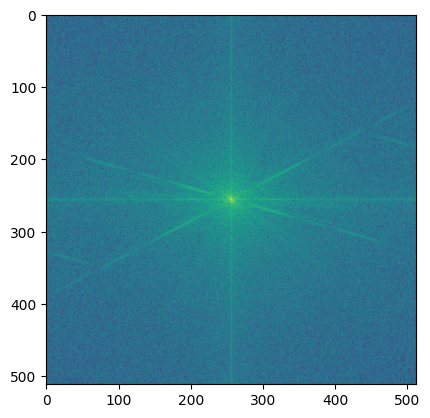

In [5]:
a = data.camera().astype(np.float64)

b = np.fft.fftshift(np.fft.fft2(a))

c = np.abs(b)
plt.imshow(np.log(c))
plt.show()

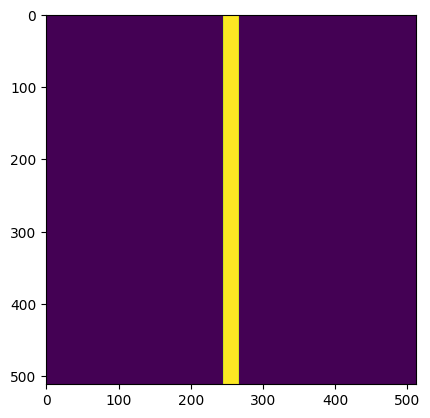

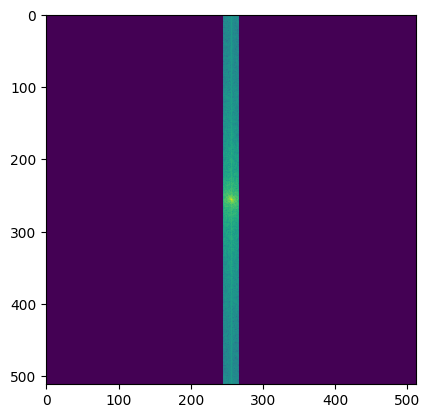

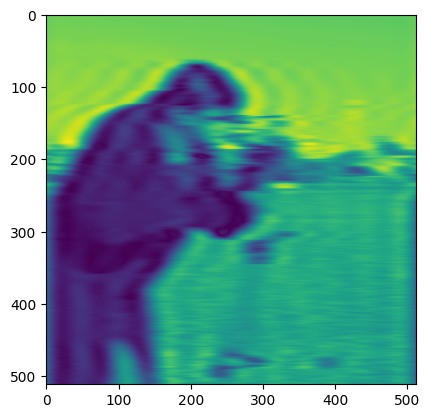

In [6]:
from numpy.fft import fft2, ifft2, fftshift 

x, y = np.meshgrid(np.linspace(-10, 10, a.shape[1]), np.linspace(-10, 10, a.shape[0]))
r = np.sqrt(x*x + y*y)

b = np.zeros_like(r)

#b[r < 2] = 0
#b[np.logical_and(x*x < 0.2, y*y < 8)] = 1
b[x*x < 0.2] = 1
plt.imshow(b)
plt.show()



c = fftshift(fft2(a)) * b

plt.imshow(np.abs(np.log(np.abs(fftshift(fft2(a)))) * b))
plt.show()

plt.imshow(np.abs(ifft2(c)))
plt.show()


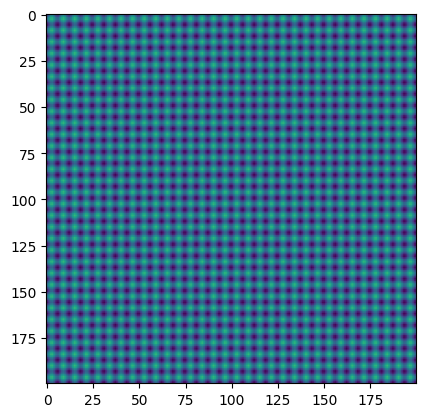

In [7]:
x, y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

angle = 0#np.pi/6
x_ = x*np.cos(angle) + y*np.sin(angle)
y_ = -x*np.sin(angle) + y*np.cos(angle)

a = np.sin(5*x_)**2 + np.sin(5*y_)**2


plt.imshow(a, vmin=0, vmax=3)
plt.show()

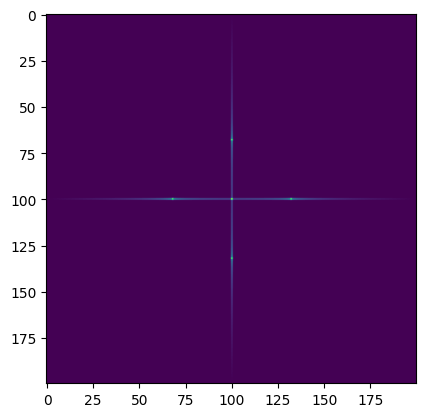

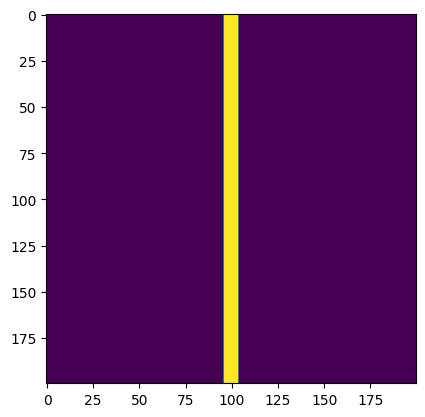

C:\Users\e-min\AppData\Local\Temp\ipykernel_94252\2745832409.py:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.abs(np.log(np.abs(fftshift(fft2(a)))) * b))
C:\Users\e-min\AppData\Local\Temp\ipykernel_94252\2745832409.py:20: RuntimeWarning: invalid value encountered in multiply
  plt.imshow(np.abs(np.log(np.abs(fftshift(fft2(a)))) * b))


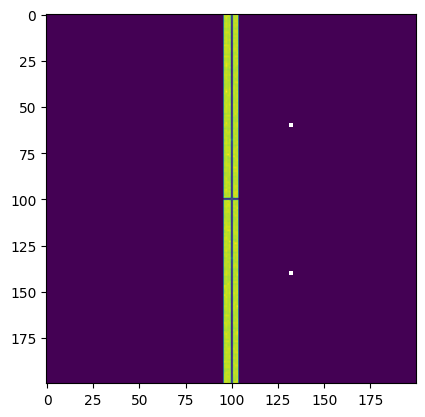

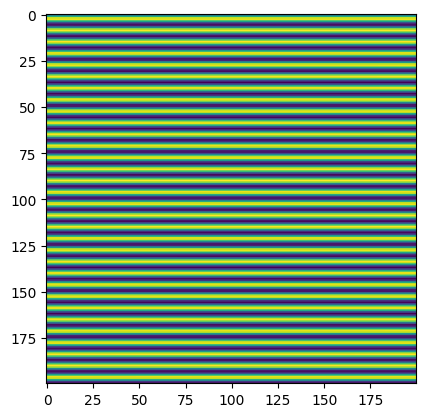

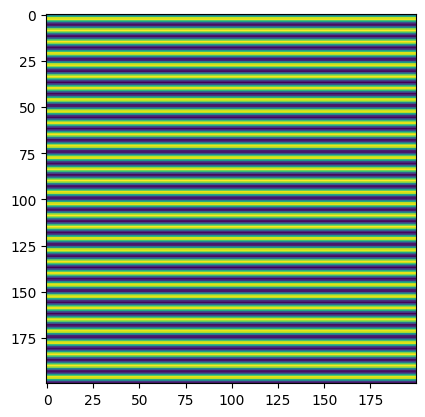

In [8]:
af = fftshift(fft2(a))

plt.imshow(np.log(np.abs(af) + 1))
plt.show()

x, y = np.meshgrid(np.linspace(-10, 10, a.shape[1]), np.linspace(-10, 10, a.shape[0]))
r = np.sqrt(x*x + y*y)

b = np.zeros_like(r)

#b[r < 2] = 0
#b[np.logical_and(x*x < 0.2, y*y < 8)] = 1
b[x*x < 0.2] = 1
plt.imshow(b)
plt.show()


c = fftshift(fft2(a)) * b

plt.imshow(np.abs(np.log(np.abs(fftshift(fft2(a)))) * b))
plt.show()

plt.imshow(np.abs(ifft2(c)))
plt.show()

plt.imshow(np.sin(5*y_)**2)
plt.show()

# Convolution

In [2]:
import numpy as np
from matplotlib import pyplot as plt

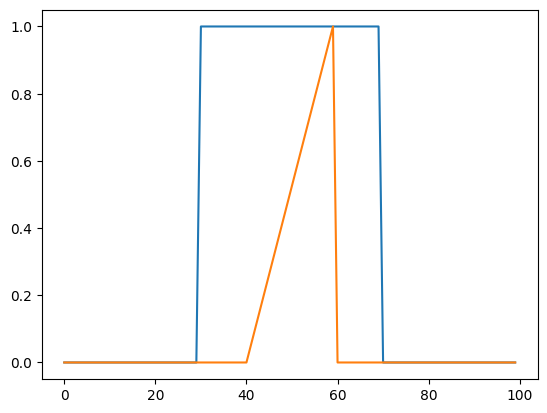

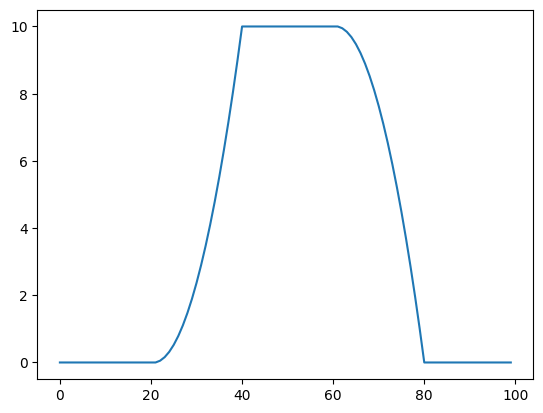

In [10]:
a = np.zeros(100, dtype=np.float64)
a[30:70] = 1
b = np.zeros(100, dtype=np.float64)
b[40:60] = np.linspace(0, 1, 20)

plt.plot(a)
plt.plot(b)
plt.show()


a = np.concatenate([np.zeros(50), a, np.zeros(50)])
conv_ab = np.zeros_like(b)
for i in range(100):
    conv_ab[i] = np.sum(a[i:i+100] * b[::-1])

plt.plot(conv_ab)
plt.show()

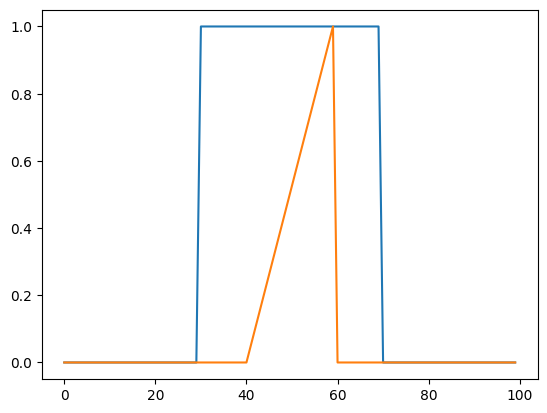

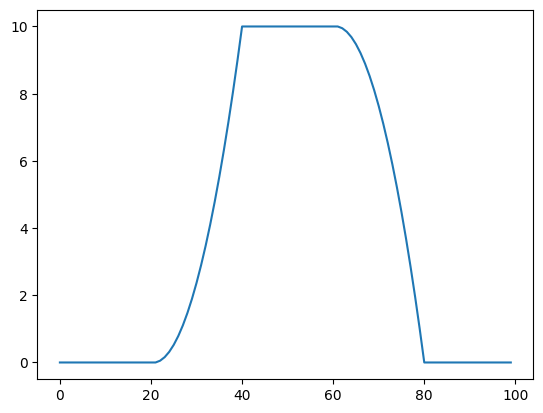

In [4]:
from numpy.fft import fft, ifft, fftshift

a = np.zeros(100, dtype=np.float64)
a[30:70] = 1
b = np.zeros(100, dtype=np.float64)
b[40:60] = np.linspace(0, 1, 20)

plt.plot(a)
plt.plot(b)
plt.show()


a = np.concatenate([np.zeros(50), a, np.zeros(50)])
b = np.concatenate([np.zeros(50), b, np.zeros(50)])
conv_ab = fftshift(ifft(fft(a) * fft(b)))[49:149]

plt.plot(conv_ab)
plt.show()

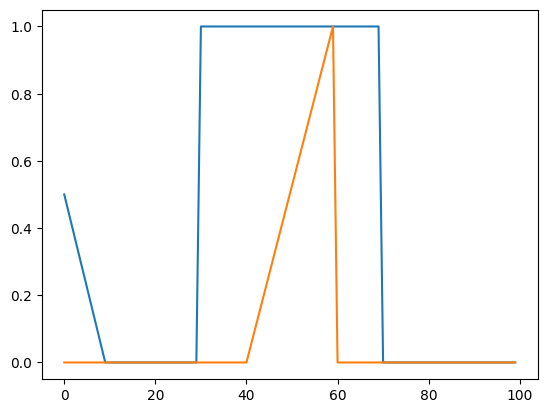

c:\Users\e-min\anaconda3\envs\WaO\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


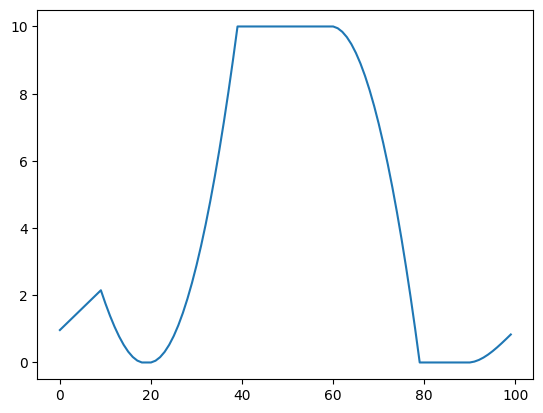

In [7]:
from numpy.fft import fft, ifft, fftshift

a = np.zeros(100, dtype=np.float64)
a[:10] = np.linspace(0.5, 0, 10)
a[30:70] = 1
b = np.zeros(100, dtype=np.float64)
b[40:60] = np.linspace(0, 1, 20)

plt.plot(a)
plt.plot(b)
plt.show()


a = np.concatenate([a])
b = np.concatenate([b])
conv_ab = fftshift(ifft(fft(a) * fft(b)))

plt.plot(conv_ab)
plt.show()

# Diffraction

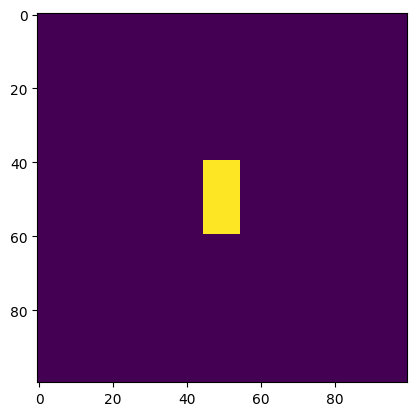

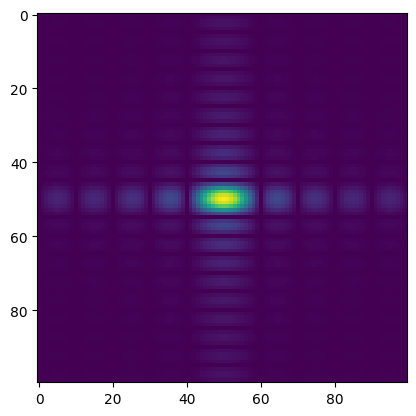

In [10]:
# input
from numpy.fft import fftshift, fft2, ifft2 


x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

a = np.where(np.logical_and(np.abs(xx)<1, np.abs(yy)<2), 1.0, 0.0)

plt.imshow(a)
plt.show()

c = np.abs(fftshift(fft2(a)))

plt.imshow(c)
plt.show()

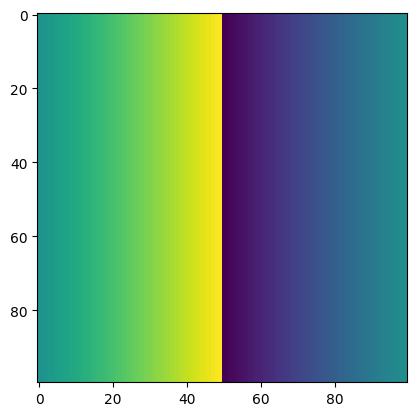

In [12]:
u = np.fft.fftfreq(np.shape(x)[0], x[1] - x[0])
v = np.fft.fftfreq(np.shape(y)[0], y[1] - y[0])
uu, vv = np.meshgrid(u, v)

plt.imshow(uu)
plt.show()

C:\Users\e-min\AppData\Local\Temp\ipykernel_84952\2112192554.py:3: RuntimeWarning: invalid value encountered in sqrt
  k_ = np.where(s>0, np.sqrt(s), 1j*np.sqrt(-s))


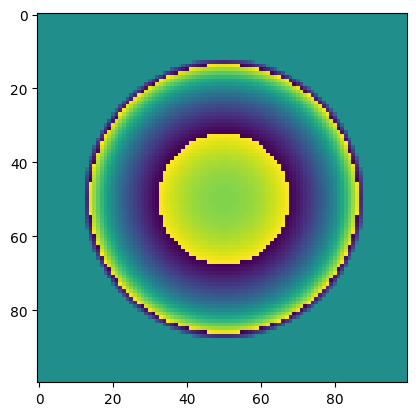

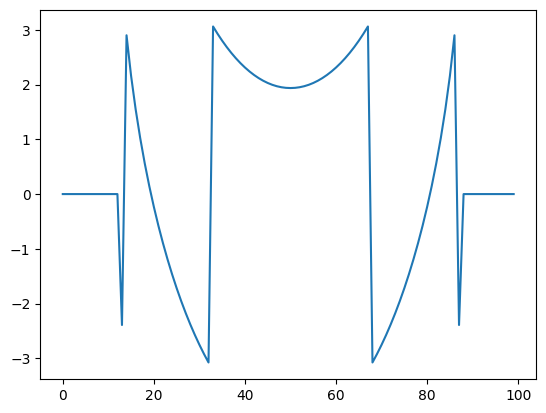

In [28]:
wl = 532e-3
s = 1/(wl**2) - uu*uu - vv*vv
k_ = np.where(s>0, np.sqrt(s), 1j*np.sqrt(-s))
z = 0.9
H = np.exp(-1j*2*np.pi*z*k_)

plt.imshow(fftshift(np.angle(H)))
plt.show()

plt.plot(fftshift(np.angle(H))[50, :])
plt.show()

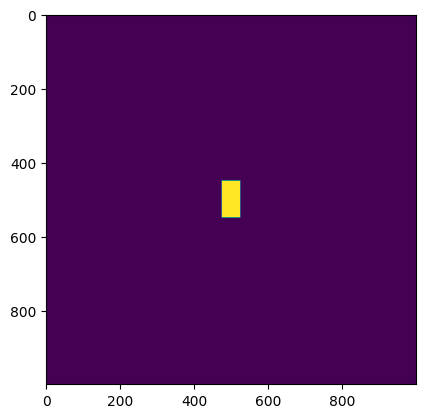

C:\Users\e-min\AppData\Local\Temp\ipykernel_89920\693127816.py:22: RuntimeWarning: invalid value encountered in sqrt
  k_ = np.where(s>0, np.sqrt(s), -1j*np.sqrt(-s))


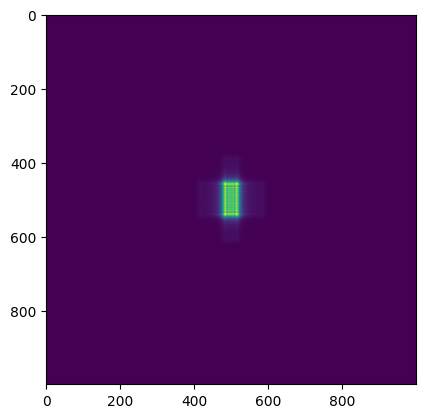

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fftshift, fft2, ifft2 


x = np.linspace(-1000, 1000, 1000)
y = np.linspace(-1000, 1000, 1000)
xx, yy = np.meshgrid(x, y)

a = np.where(np.logical_and(np.abs(xx)<50, np.abs(yy)<100), 1.0, 0.0)

plt.imshow(a)
plt.show()

u = np.fft.fftfreq(np.shape(x)[0], x[1] - x[0])
v = np.fft.fftfreq(np.shape(y)[0], y[1] - y[0])
uu, vv = np.meshgrid(u, v)


wl = 532e-3
s = 1/(wl**2) - uu*uu - vv*vv
k_ = np.where(s>0, np.sqrt(s), -1j*np.sqrt(-s))
z = 1000.0
H = np.exp(-1j*2*np.pi*z*k_)


c = ifft2(H * fft2(a))

plt.imshow(np.abs(c))
plt.show()